In [56]:
import networkx as nx
import numpy as np
import json
import random
from networkx.algorithms import bipartite
from networkx.algorithms import community
import seaborn as sns
import matplotlib.pyplot as plt
from src.helper import load_graph_from_json, draw_spring
import warnings
warnings.filterwarnings("ignore")

# 2 Key Concepts

This chapter introduces and briefly discusses key concepts of network analysis. In chapter 1 we stated that network analysis studies relationships between entities. Now we will introduce the more formal terminology of "nodes" and "edges". Likewise, we will introduce various types of networks, and some of their important measurable properties.

## 2.1 Nodes & Edges

Networks consist of two key elements: nodes and edges. Nodes are the smallest unit in a network. As indicated above, nodes can represent various types of entities: individuals, court cases, documents, words, etc. Edges are the links between two nodes. In our drone example, drone laws would be the nodes, whereas one law citing another law would constitute an edge.

Nodes can also be called vertices (singular: vertex). Edges are sometimes called lines or arcs. We will stick to 'nodes' and 'edges' throughout this book, as these are the most commonly used terms in legal network analysis.

## 2.2 Undirected networks versus directed networks
Networks (and graphs) can be directed or undirected. Directed networks record a non-reciprocal relationship. For instance, A sends a message to B, C admires D, or E cites F. The drone legislation example is a directed network. Some statute A citing another statute B does not in any way imply that B should cite A.

<img src="images/ch1/directed_graph.png" alt="drawing" width="150"/>

By contrast undirected networks record reciprocal relationships. Here the existence of a relationship between A and B implies that the same relationship will exist between B and A. Friendship networks are typically undirected. If A is a friend of B, conceptually one can assume that B is a friend of A. One can affirm even more rigorously that similarity and difference, closeness and distance are reciprocal: the distance between A and B is the same as the distance between B and A.

<img src="images/ch1/undirected_graph.png" alt="drawing" width="150"/>

## 2.3 Network Visualization

Networks (like graphs) do not have a fixed visual representation. A network can be represented in a variety of different ways, all of them equally good from a purely formal perspective. However, not every visual representation will be equally useful.  The three plots below represent the exact same network (image from Wallis 2007, page 7). If one asks "which node is the most central one?" in relation to this particular network, the drawing on the left probably provides us the most insight and the one on the right is highly misleading (all the nodes in this network are equally central).

![image](images/ch1/equivalent_viz.png)



In order to provide an insightful visual representation of network it is necessary to order nodes in space in a way that makes sense. This is often done through physics-based algorithms. They may postulate a repulsive force among nodes, and an attractive force among edges, so that nodes that have a lot of connections are drawn further together, while those that have fewer connections are drawn further apart. Going into the workings of visualization algorithms are beyond the scope of this work as it blends into a completely different disciplinary area altogether.

Here we provide a simple visualization for the drone laws dataset. As we expect, it shows that regulation 2019R0945 stands at the center of the network. This is what we should expect given our experimental design, as this as one of the regulations that served as a source from which other laws were identified.

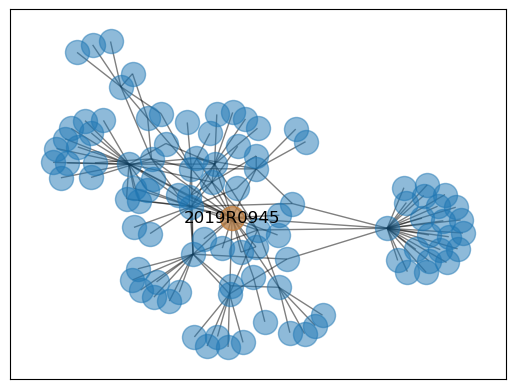

In [57]:
g_drones = load_graph_from_json("data/drone_laws/g_dronelaws_2.json")
g_drones = nx.to_undirected(g_drones)
pos = nx.spring_layout(g_drones, seed=123)
nx.draw_networkx_nodes(g_drones, pos=pos, node_color="tab:blue", alpha=0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=["2019R0945"] , node_color="tab:orange", alpha=0.5)
nx.draw_networkx_edges(g_drones, pos, alpha=0.5)
nx.draw_networkx_labels(g_drones, pos, labels={"2019R0945":"2019R0945"}, font_color="black");


## 2.4 Bipartite Graphs

Networks typically deal with relations between a single class of entities, that is to say, the nodes are of the same type, they belong to the same class. For example, we may be interested in citations between cases, friendship links between persons, similarity relationships between documents and so forth.

Yet sometimes it is interesting to consider the relationship between two different types of elements. We might want to research, for example, patterns of treaty ratification. Modelling this requires working with two types of nodes: states and treaties. This implies the creation of a bipartite network, where edges connect nodes of a different type. These sorts of networks are sometimes also called affilation networks. Below you can see an example of such a bipartite graph.

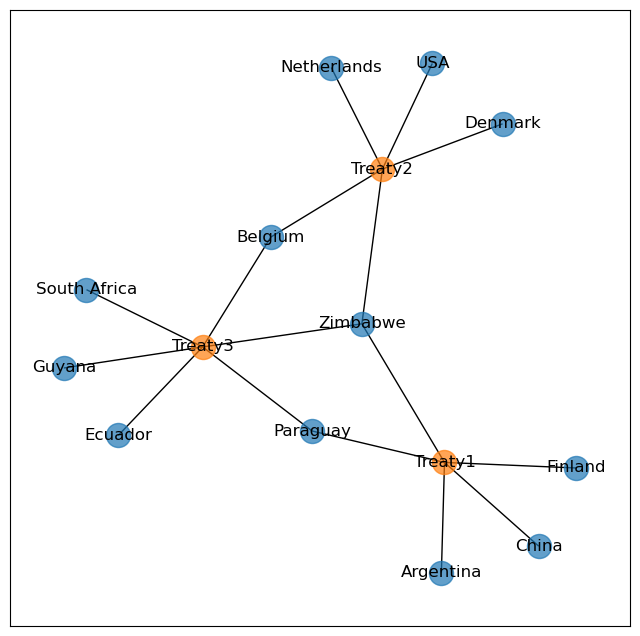

In [58]:
g_treaties = load_graph_from_json("data/g_treaties.json")
states = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 0]
treaties = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 1]
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g_treaties, seed=123)
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= states, node_color='tab:blue', alpha = 0.7)
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= treaties, node_color='tab:orange', alpha =0.7)
nx.draw_networkx_edges(g_treaties, pos=pos)
nx.draw_networkx_labels(g_treaties, pos=pos);

Our running example of the network of drone legislation is not bipartite in nature. However it can be represented as a bipartite network for illustration purposes. Nodes 2019R0945, 2019R0947, 2021R0664, and 2021R0665 are drone-specific laws, meaning that they consist of rules that specifically apply to drones. In contrast, the other laws include rules that may be relevant to drones but are not specifically drafted with drones in mind. Think of rules on aviation or perhaps privacy or cybersecurity. The visualization shows which laws are considered drone-specific legislation and which ones are not and their relationships.

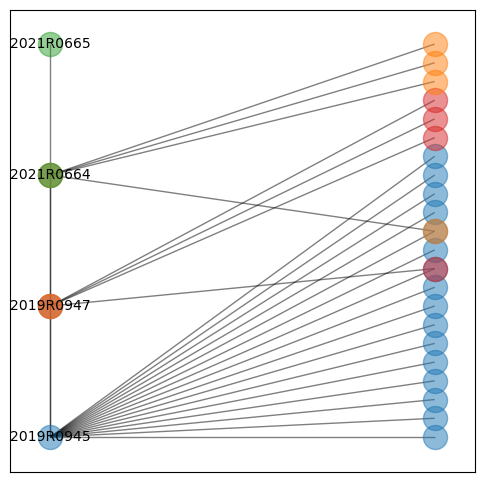

In [59]:
drone_specific = ["2019R0945", "2019R0947", "2021R0664", "2021R0665"]
level0_nodes = [x for x in g_drones if x not in drone_specific]
level1_nodes = [drone_specific]
edges_for_2019R0945 = [(x,y) for x, y in g_drones.edges() if x == "2019R0945"]
edges_for_2019R0947 = [(x,y) for x, y in g_drones.edges() if x == "2019R0947"]
edges_for_2021R0664 = [(x,y) for x, y in g_drones.edges() if x == "2021R0664"]
edges_for_2021R0665 = [(x,y) for x, y in g_drones.edges() if x == "2021R0665"]

g_drones_bipartite = nx.Graph()

g_drones_bipartite.add_edges_from(edges_for_2019R0945)
g_drones_bipartite.add_edges_from(edges_for_2019R0947)
g_drones_bipartite.add_edges_from(edges_for_2021R0664)
g_drones_bipartite.add_edges_from(edges_for_2021R0665)


nodeset1 = [y for x,y in edges_for_2019R0945]+["2019R0945"]
nodeset2 = [y for x, y in edges_for_2019R0947]+["2019R0947"]
nodeset3 = [y for x, y in edges_for_2021R0664]+["2021R0664"]
nodeset4 = [y for x, y in edges_for_2021R0665]+["2021R0665"]

plt.figure(figsize=(6, 6))
pos = nx.bipartite_layout(g_drones_bipartite, nodes=drone_specific)

nx.draw_networkx_nodes(g_drones_bipartite, nodelist=nodeset1, node_color="tab:blue", pos = pos, alpha=0.5)
nx.draw_networkx_edges(g_drones_bipartite, edgelist= edges_for_2019R0945, pos = pos, alpha=0.5)

nx.draw_networkx_nodes(g_drones_bipartite, nodelist=nodeset2, node_color="tab:red", pos = pos, alpha=0.5)
nx.draw_networkx_edges(g_drones_bipartite, edgelist= edges_for_2019R0947, pos = pos, alpha=0.5)

nx.draw_networkx_nodes(g_drones_bipartite, nodelist=nodeset3, node_color="tab:orange", pos = pos, alpha=0.5)
nx.draw_networkx_edges(g_drones_bipartite, edgelist= edges_for_2021R0664, pos = pos, alpha=0.5)

nx.draw_networkx_nodes(g_drones_bipartite, nodelist=nodeset4, node_color="tab:green", pos = pos, alpha=0.5)
nx.draw_networkx_edges(g_drones_bipartite, edgelist= edges_for_2021R0665, pos = pos, alpha=0.5)

nx.draw_networkx_labels(g_drones_bipartite, pos=pos, labels={x:x for x in drone_specific}, font_size=10);

# 2.5 Subgraphs

A subgraph is a partition of a graph, normally into a smaller sub-section of it. Here we illustrate a subgraph by cutting out the "tail" of the kite.

It should be noted that a subgraph completely erases the relationship that may exist between nodes in the graph and those in the subgraph.  If one simply selects a few nodes, these nodes the relational properties of the nodes will appear unchanged. The for example it may be seen that node "6" will still have 4 neighbors, 3, 4, 5 and 7, even though 7 has not been selected. By contrast a subgraph will erase the information that no longer pertains to the chosen nodes, so then node 6 will only have 3 neighbors in this subgraph. This minor detail will become important when discussing modularity later on.

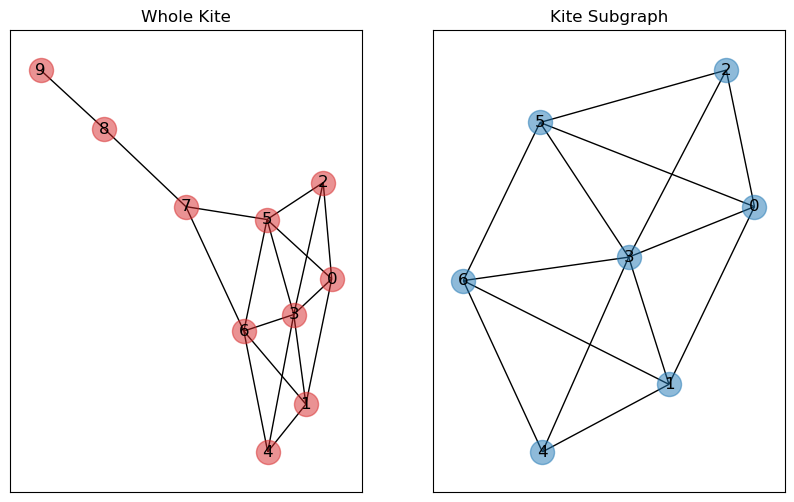

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
g_kite = nx.krackhardt_kite_graph()
g_subkite = nx.subgraph (g_kite, [0, 1, 2, 3, 4, 5, 6])

pos = nx.spring_layout(g_kite, seed=123)
nx.draw_networkx_nodes(g_kite, pos=pos, ax=ax[0], node_color="tab:red", alpha=0.5)
nx.draw_networkx_labels(g_kite, pos=pos, ax=ax[0])
nx.draw_networkx_edges(g_kite, pos=pos, ax=ax[0])

nx.draw_networkx_nodes(g_subkite, pos=pos, ax=ax[1], node_color="tab:blue", alpha=0.5)
nx.draw_networkx_labels(g_subkite, pos=pos, ax=ax[1])
nx.draw_networkx_edges(g_subkite, pos=pos, ax=ax[1])
ax[0].set_title("Whole Kite")
ax[1].set_title("Kite Subgraph");

### Ego Networks

One important type of subgraph is the ego network, which is centered on one particular node (the 'ego' or self) and then contains only those nodes that have a path to the ego within a given radius. That is to say, we can see only the nodes that are a defined number of steps away from the ego.

The drone legislation example is an ego network. This is the result of the way in which it was construed. By including all references in the a specific node (node 2019R0945), the references to the node, and the references to the references to the node, the resulting network is one that is centered around the source node (node 2019R0945).

An ego network can be useful to zoom in on one particular set of relations. For example, using the karate club graph we can use ego networks to see all the nodes that are one step away from the karate instructor (node 33 in the networkx version of the dataset).

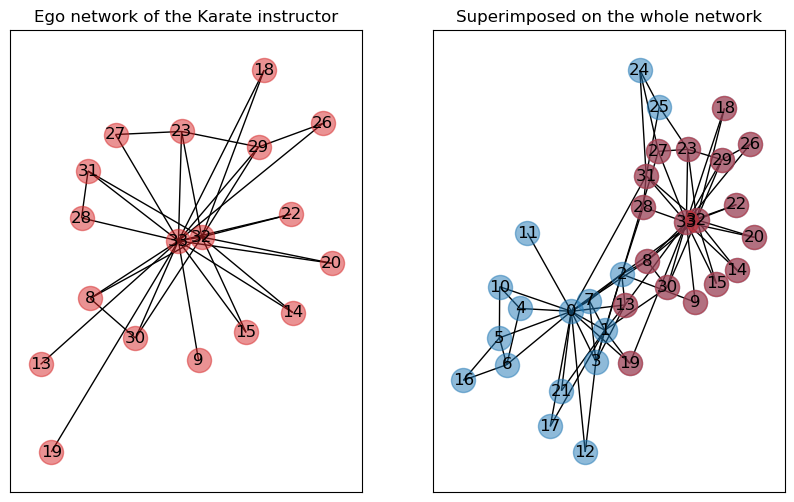

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
g_karate = nx.karate_club_graph()
ego_karate = nx.ego_graph(g_karate, 33)
pos = nx.spring_layout(g_karate, seed=123)
nx.draw_networkx_nodes(ego_karate, pos=pos, ax=ax[0], node_color="tab:red", alpha=0.5)
nx.draw_networkx_labels(ego_karate, pos=pos, ax=ax[0])
nx.draw_networkx_edges(ego_karate, pos=pos, ax=ax[0])
nx.draw_networkx_nodes(g_karate, pos=pos, ax=ax[1], node_color="tab:blue", alpha=0.5)
nx.draw_networkx_nodes(ego_karate, pos=pos, node_color="tab:red", ax=ax[1], alpha=0.5)
nx.draw_networkx_labels(g_karate, pos=pos, ax=ax[1])
nx.draw_networkx_edges(g_karate, pos=pos, ax=ax[1])
ax[0].set_title("Ego network of the Karate instructor")
ax[1].set_title("Superimposed on the whole network");

## 2.6 Directed Acyclic Graph (DAG)

Another special type of graph is a directed acyclic graph or DAG. A DAG is a directed graph that has no cycles or loops, hence it is 'acyclic'.

Citation networks, which are often used in legal network analysis, should in theory be DAGs. Newer cases will cite older cases and not the other way around. Likewise, cases should not cite themselves. As a result, there should in theory be no loops in case citation networks. In practice, however, this does not always hold. Loops may occur, for instance in two cases written around the same time, where the drafters of each case had knowledge of the existance of the other case. The cases then are published in different dates, in a way that does not reflect the fact that they were written contemporaneusly.

Our drone legislation example is also a DAG. It is directed, because one law cites another, it is acyclic, because more recent legislation cites less recent legislation and not the other way around, and it is a graph that consists of nodes and edges.

DAGs are particularly important in the modeling of causal processes, on the understanding that causation is always linear and undirectional. To illustrate, we draw a toy example of a casual model that predicts a country will ratify a free trade treaty if the country is democratic, has a liberal government, has high unemployment, and a high percentage of young citizens. The supposed effect in htis model is directional and not cyclic (once the free trade treaty is ratified, this does not, in turn, make it more likely that democracy will prevail). This work does not delve further into DAGs as such.

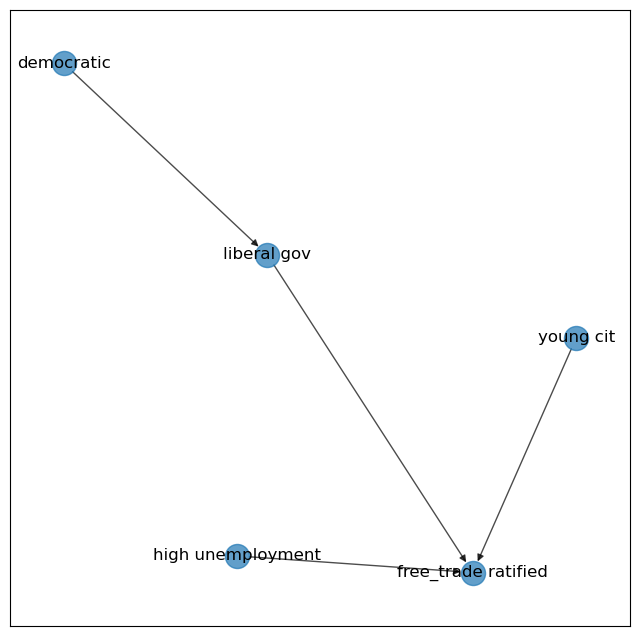

In [62]:
g_dag = nx.DiGraph()
g_dag.add_edge("democratic", "liberal gov")
g_dag.add_edge("liberal gov", "free_trade ratified")
g_dag.add_edge("young cit", "free_trade ratified")
g_dag.add_edge("high unemployment", "free_trade ratified")

draw_spring(g_dag)

## 2.7 Trees

There are many types of trees. An intuitive one is the "rooted tree", which parallels what we may naively understand as a tree: graphs without loops with a single root node to which all the other nodes are connected (directly or indirectly). 

Trees can have a parameter controlling in how many segments they branch out, and another controlling their height or depth, that is in this case, how far away the furthest leaf is from the root. Here we can see a binary tree of height 3. The tree is binary because node branches out into at most 2 other nodes, and the height is 3 because the nodes are at most 3 steps removed from the root.

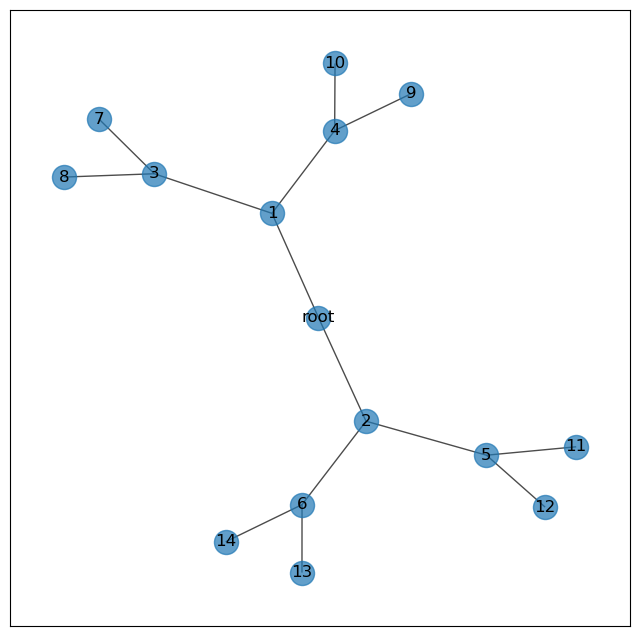

In [63]:
g_tree = nx.Graph()
g_tree.add_nodes_from(["root", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
g_tree.add_edges_from([("root",1),("root",2),(1,3),(1,4),(2,5),(2,6),(3,7),(3,8),
                       (4,9),(4,10),(5,11),(5,12),(6,13),(6,14)])
draw_spring(g_tree)

Trees can be directed or undirected. Directed trees can flow from the root out towards the leaves, or vice versa, flow from the leaves into the root. Trees are not necessarily rooted.

There is a great variety of trees, and the tree data structure is widely used by many disciplines. This work does not delve further into trees.

## 2.8 Graphs versus Networks

Graphs and networks are sometimes used interchangeably. However, the terms point to different aspects of the graph structure and to different fields of study. 

At the graph level, it is irrelevant wether the nodes and edges represent friendship relations, connections between subway stations, or participation in a criminal organization. The focus is on the nodes and edges are considered abstractly. Graph theory is a field of mathematics that explores the abstract properties of graphs.

Networks are based on graphs (hence on nodes and edges), but they are used to study concrete relationships between entities: treaty ratifications by states, citations between court cases, similarity between documents, etc. Moreover, the nodes and edges can be enriched with even more information (which may be called metadata, see Chapter 2, sections 5 and 6). For example, if nodes consist of documents, a network might record the language of the documents, the name of the authors, the year of publication, etc.

Moreover graphs are tipically small, and are inspected through formal mathematical means. By contrast, networks are tipically large (what large means can vary from hundreds, thousands, millions of connections or more, depending on the what the network models) and are inspected through statistics or algorithms.


## 2.9 Power Law Distribution

Connections in networks tipically follow a power law distribution. A power law distribution entails that the frequency distributions of network connections is highly skewed. For example, it is common in legal network analysis, particularly the analysis of citation networks, that a few nodes have a very high number of citations and most nodes a small number citations. 

We illustrate this by means of a network of  Court of Justice of the European Union (CJEU) case law, where the source nodes consist of cases that are labeled as 'consumer protection'. With source nodes, we mean the cases that were searched and for which the citations in those cases were harvested. In this network, the cases are the nodes and the references in and to the cases the edges. The network consists of 1,614 nodes (cases) and 2,662 edges (references).

Below, we plot the distribution of incoming citations among the cases by means of a histogram. The horizontal axis shows the number of incoming citations and the vertical axis the number of cases. The results reveal that a relatively small number of cases have a relatively high number of incoming citations (the sparse right tail of the histogram recording 40 or more citations), whereas there are a lot of cases that are hardly ever, if at all, cited (the towering bar on the left side of the histogram recording cases with around 0 citations).


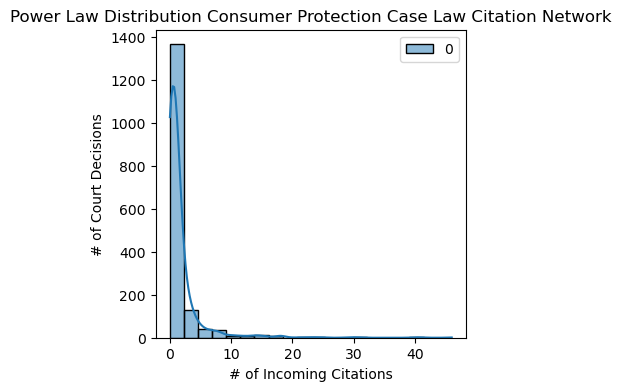

In [64]:
g_consprot = load_graph_from_json("data/g_consprot.json")
plt.figure(figsize=(4,4))
plt.title("Power Law Distribution Consumer Protection Case Law Citation Network")
plt.xlabel("# of Incoming Citations") #add label
plt.ylabel("# of Court Decisions") #add label
sns.histplot(dict(g_consprot.in_degree).values(), stat="count", bins=20, kde=True);

'Law' in power law distributions refers to something akin to a 'law of nature'. A power law distribution is an empirical fact of certain networks such as citation networks or social networks.

Viewed dynamically power Law distributions are associated with the idea of preferential attachment: Ihe nodes with many edges are likely to receive more edges (e.g., citations) in the future for the mere fact that they already had many edges before. This is also called the 'rich get richer' effect.

## 2.10 Paths, Shortest Paths, and Distance between Nodes

A path is a series of steps getting from node A to node B. For any node of the network, it is possible to calculate the path it has to other nodes (if such a path exists) and its distance. The distance is the number of steps, or the number of steps weighted by any relevant weight metric. 

Some complications deserve mention here, which are further discussed below:

* Disconnected nodes
* Fully connected networks
* Shortest path
* Weighted paths
* Random paths
* Eccentricity and network diameter

### Disconnected Nodes

It is not guaranteed that there will be a path between two nodes. It is possible that two sets of nodes are simply not connected. This situation can be observed in the example below, where nodes A, B, and C, are disconnected from nodes D and E.

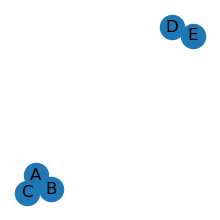

In [65]:
g_disconnected = nx.Graph()
g_disconnected.add_nodes_from(['A','B','C','D','E'])
g_disconnected.add_edges_from([('A','B'),('B','C'), ('C','A'),('D','E')])
plt.figure(figsize=(2, 2))
nx.draw_spring(g_disconnected, with_labels=True)
plt.show()

### Fully connected networks

A network is fully connected if every node is connected to every other node. To see how this will look consider these graphs from Wolfram (https://mathworld.wolfram.com/CompleteGraph.html)

![image](images/ch2/wolfram.png)

A fully connected network will have a fixed number of edges as a function of how many nodes it has. That is, for every node $n$ a fully connected network will have $ \frac{n(n-1)}{2} $ edges. Note that for such networks it would be pointless to try to distinguish between nodes using measures like centrality or community, unless the edges have differing weights.

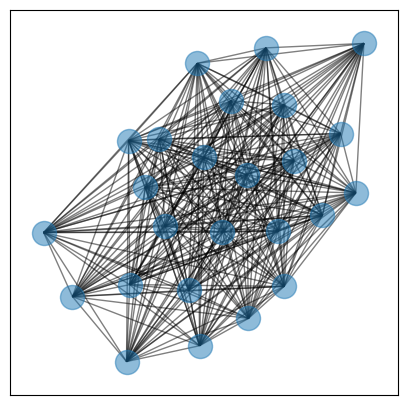

In [66]:
g_distances = load_graph_from_json("data/g_distances.json")
plt.figure(figsize=(5,5))
pos = nx.spring_layout(g_distances, seed=121)

nx.draw_networkx_nodes(g_distances, pos, alpha = 0.5)
nx.draw_networkx_edges(g_distances, pos=pos, edge_color='black', alpha=0.5)

In [67]:
nx.is_connected(g_distances)

True

### Connected components.

A fully connected network is one where every node is connected to every other node, making nodes positionally indistinguishable from each other. Another different, but similarly worded, classification is perhaps more important and deals with network "components" rather than nodes. A network component is a reachable area of the network. If the network has a single area -a single continent- then it has only one component. If a network has two fully disconnected areas, two islands, then it has two components, etc. Algorithms exist to identify hwo many components a network has (although for all the examples we use in this book, the number of components can be visually identified).

### Weakly and strongly connected networks

Taking up the perspective of components, one can introduce two further concepts: weakly and strongly connected networks. The first thing to consider here is that these concepts only apply to directed networks. The reason for this is that the concept of connected components does the same thing for undirected networks.

In a directed network the property of being weakly connected is fulfilled if there is only one component, only one continent no nodes are in an unreachable island, on the assumption that the network behaves as undirected. So in a weakly connected directed network there are no islands, in a sense, but it is very well possible to get "stuck" in a particular node without being able to get out, as there is no directed path back towards the other nodes.

Because it has no "islands", the drone legislation network is weakly connected.

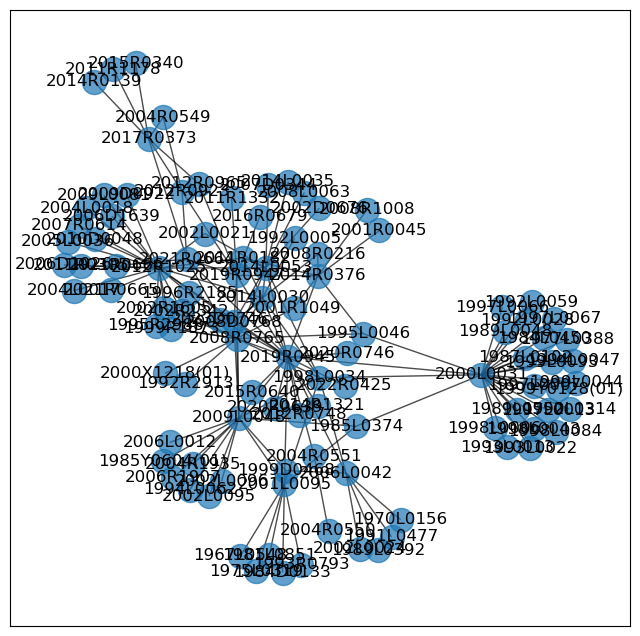

In [68]:
draw_spring(g_drones)

In [69]:
g_drones = load_graph_from_json("data/drone_laws/g_dronelaws_2.json")
print("The drones network is weakly connected:", nx.is_weakly_connected(g_drones))

The drones network is weakly connected: True


A *strongly* connected network takes the direction of the edges into consideration. Strongly connected means there is a path between any two nodes in both directions. Put differently, there is a path from $u$ to $v$ and a path from $v$ to $u$ for any two nodes $u$ and $v$. The drone legislation network is not strongly connected. Note that there has to be a path to and back from any two nodes, not an edge. The path can pass through other nodes.

A strongly connected network must have cycles. The drone legislation network that we havea already presented is not a strongly connected, as stated earlier, it is a DAG, it has no cycles.

In [70]:
print("The drones network is strongly connected:", nx.is_strongly_connected(g_drones))

The drones network is strongly connected: False


### Shortest paths

The shortest path is the path that will reach a node in the smallest number of steps. There can be more than one "shortest path" (but all the shortest paths will have the same smallest number of steps). For example, if we look at the kite graph, there are two shortest paths from 7 to 3, one going through 6, and another going through 5. There are "longer paths" too, for example, 7 -> 5 -> 2 -> 3. These may not be immediately relevant, but might be interesting possible random paths, between 7 and 3.

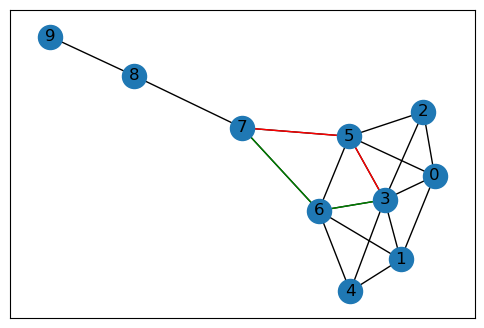

In [71]:
g_kite = nx.krackhardt_kite_graph()
plt.figure(figsize=(6,4))
pos = nx.spring_layout(g_kite, seed=123)
nx.draw_networkx_nodes(g_kite, pos)
nx.draw_networkx_edges(g_kite, pos=pos)
nx.draw_networkx_edges(g_kite, edgelist=[(7,5),(5,3)], edge_color="red", pos=pos)
nx.draw_networkx_edges(g_kite, edgelist=[(7,6),(6,3)], edge_color="green", pos=pos)
nx.draw_networkx_labels(g_kite, pos=pos);

While shortest paths can be easy to 'see' in small graphs like this one, this will not be possible in more complex graphs. Finding the shortest path will then be a non-trivial problem. This process is automated by network analysis libraries and programs. We use this automation to find the shortest paths in the drone legislation network.



In [72]:
# Select source and target node
NodeA = '2006L0042'
NodeB = '2017R0373'
# For shortest path lengths between all pairs of nodes
shortest_paths_lengths = dict(nx.shortest_path_length(g_drones))
# Print the shortest path length from one specific node to another
print("Shortest path between", NodeA, "and", NodeB, ":", nx.shortest_path_length(g_drones, source=NodeA, target=NodeB))

Shortest path between 2006L0042 and 2017R0373 : 3


>Note that because the network is directed, there is no path, and therefore no shortest path, from 2019R0945 to 2021R0665.

Shortest paths are useful for many purposes. It will be seen that they are key ingredients in many algorithms for identifying the most important or most central nodes of a network.

For the unweighted graphs that we are using, a shortest path counts discrete 'steps' between nodes. This implies that all the nodes are a unit distance away. However, it is also possible to have weighted paths, as we will discuss later. 

### Random paths

The length of the shortest path will be a definite number. However, there may be a large or arbitrary number of non-shortest paths wandering through the nodes. 

A single arbitrary path will not be of much interest (why this one?, why not another one?), but if we allow movement randomly from node to node, these random paths - random walks - can become useful. We may be interested not only in the shortest path between A and B, but in the average path distance between A and B, taking into account routes that go more or less directly from A to B as well as those that make longer detours. By measuring a number of random walks for a number of nodes in the network, it will often become clear that some nodes are more likely to be passed through than other nodes.

We illustrate the shortest path with a coding example. We create a random path with the neighbors method of the Graph object. The steps are more or less like this:

1. Select a number of steps for the walk. In this case four steps. Execute the tasks below until you hit four steps.
2. Select a particular node to start with, for example node 7.
3. Find all the neighbors of node 7 (in this case, 5, 6, 8).
4. Randomly choose one of these nodes to go to. Say choose node 5.
5. Update the value of your start position to the chosen node, in this case 5.
6. Record that you have made one step (3 to go).
7. If you have made less than four steps, go back to step 2. If you have made four steps, stop.

These steps can be implemented in code as follows:

In [73]:
# here we are limiting the number of steps to 4, we get 5 steps in the answer because the answer includes the start node, and n is initialized at 0.

n = 0
start = 7
history = [start]
while n < 4:
  my_neighbors = list(g_kite.neighbors(start))
  move_to_node = np.random.choice(my_neighbors)
  history.append(move_to_node.tolist())
  start = move_to_node
  n += 1

print(history)

[7, 6, 1, 3, 5]


Most likely we will not be interest in a single random path, but in lots of them, and they can be generated in bulk.

In [74]:
random_paths = nx.generate_random_paths(g_kite, sample_size=10, path_length=4)
for i in random_paths:
    print(i)

[2, 0, 1, 6, 5]
[5, 6, 3, 6, 5]
[3, 0, 5, 2, 3]
[5, 0, 3, 0, 5]
[4, 1, 0, 1, 3]
[7, 5, 3, 4, 1]
[0, 2, 3, 5, 3]
[6, 3, 0, 3, 4]
[8, 9, 8, 7, 8]
[5, 3, 1, 6, 3]


### Weighted edges

An edge can show that there is a relationship between nodes A and B. The nature of that relationship can be many things, such as there being a train between A and B, or that case A cites case B. In these instances the relationship is binary: There either is a connection or there is not.

However, there is a range of situation where one wants to record the strength of a connection and not just its presence. For example, one might want to record not only that there is train path from A to B but also how long that path is in terms of kilometers. We might want to score not only that case A cites case B but also how many times case B is cited by case A. We can add this attribute to the edge by giving weights to edges. For instance, if case A cites case B four times, the edge weight becomes four.

Weighted networks can be represented visually in an intuitive way by using different colors or line styles for their edges. Below is a network using a document similarity matrix. This matrix records how close two documents are in light of the tokens they share (Jaccard distance) and scores them with 1 if they are identical, and 0 if they are completely different. It is made of a set of ECHR Grand Chamber judgments on the extraterritorial application of fundamental rights.
In the process of comparing the distance between each document, this dataframe is turned into a matrix, and that can be used to build a network. Please see Appendix 1: "Text Similarity Networks" for more details of how this can be done.

The purpose of this example is to show that if you graph the network without consideration of weight, it gives you a fully connected network, which is a nice geometrical figure, but not very informative. Every document was compared to every other document, so every node is on step (one degree) of separation from every other and so every node has the exact same number of neighbors.

A more informative network structure can be shown if we take consideration of weight. One way to do this is to pick only the edges whose weight meets a certain test. Here we are simply whose weight surpases the mean weight plus one standard deviation.

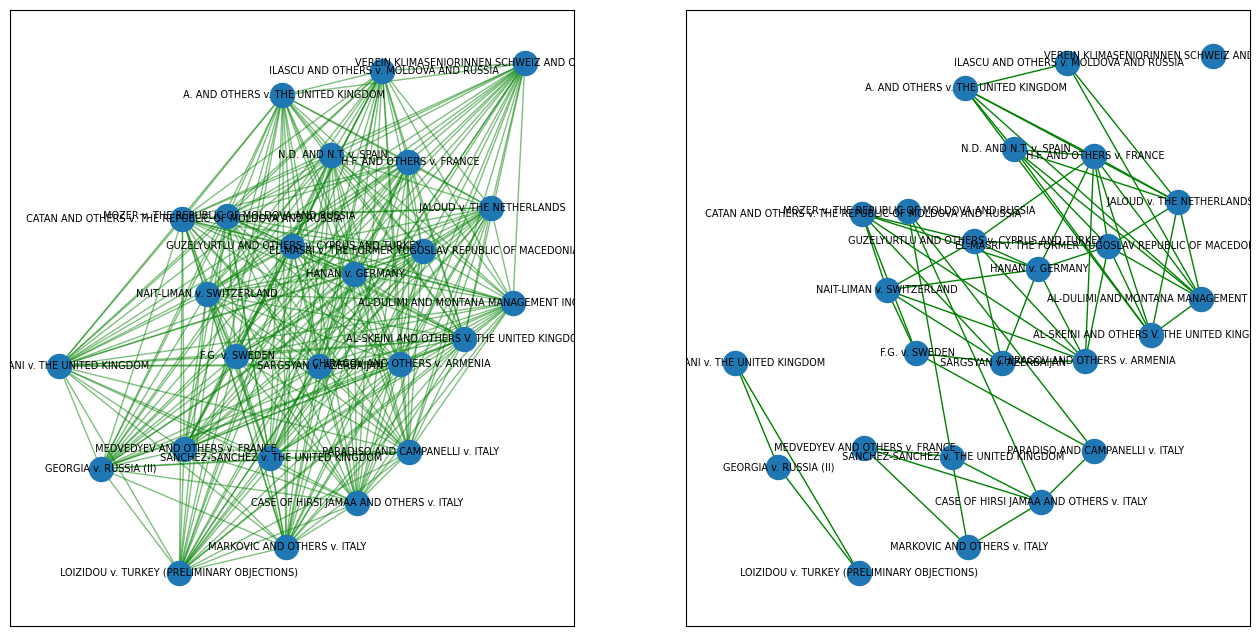

In [75]:
g_distances = load_graph_from_json("data/g_distances.json")
mean_simil = np.mean([z for x,y,z in g_distances.edges.data("weight")])
std_mimil = np.std([z for x,y,z in g_distances.edges.data("weight")])

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
pos = nx.spring_layout(g_distances, seed=121)


nx.draw_networkx_nodes(g_distances, pos, ax=ax[0])
nx.draw_networkx_edges(g_distances, pos=pos, edge_color='green', ax=ax[0], alpha=0.5)
nx.draw_networkx_labels(g_distances, pos=pos, font_size=7, ax = ax[0]);

nx.draw_networkx_nodes(g_distances, pos, ax=ax[1])
lowweight = [e for e in g_distances.edges if g_distances.edges[e]['weight'] < mean_simil+std_mimil]
highweight = [e for e in g_distances.edges if g_distances.edges[e]['weight'] > mean_simil+std_mimil]
nx.draw_networkx_edges(g_distances, edgelist=highweight, pos=pos, edge_color='green', ax=ax[1])
nx.draw_networkx_labels(g_distances, pos=pos, font_size=7, ax = ax[1]);

We stated that assessing centrality or community of fully connected networks can be pointless, for all the nodes are then by definition connected to all the other nodes, and so they will get identical scores. However, in weighted networks it is not pointless to assess the centrality or community of its nodes, because the edges have different weights.

Calculating shortest paths for weighted edges involves not modifying the search to find not the connection with the smallest number of steps, but the connection with the smallest number of steps multiplied by their weight.


### Network Density

Recall the fully connected networks discussed earlier:

![image](images/ch2/wolfram.png)

Since every node here will be connected to every other node (there are no strangers, everyone is a neighbor of everyone else, everyone has maximum popularity) it can be said that these networks are maximally dense.

A maximally dense network will have $ \frac{n(n-1)}{2} $ edges. Consequently, a network with 3 nodes can have a maximum of 3 edges, a network with 4 nodes 6 edges, a network with 5 nodes 10 edges, and so forth.

The network density will be the ratio of the number of edges actually present $ m $ to the hypothetical maximum, in other words:

$$ \frac{m}{n(n-1)/2} $$

Using this formula, we can calculate the density of our drone legislation network. The density is fairly low (.02), which coincides with a visual inspection of the network, where we can observe that nodes are frequently connected to one other node but not to other nodes. Consequently, the number of actual edges to a node is far less than the number of possible edges to other nodes.

In [76]:
n = g_drones.number_of_nodes()
m = g_drones.number_of_edges()

if n > 1:
    density = m / (n * (n - 1) / 2)
else:
    density = 0  # The density of a graph with 1 or 0 nodes is defined as 0

print("Density of the graph:", density)


Density of the graph: 0.028149873810910504


### Eccentricity and Network Diameter

Next we need to consider eccentricity. Eccentricity records the longest shortest path between
every node. In the kite graph above, we can see that the eccentricity of node 9 is 4, as the maximum shortest path that exist between that node and some other node is four steps. Node 7, by contrast, has a maximum eccentricity of 2, as the longest shortest path that exist between it any other node is just 2.

Just as we can be interested in what is the center of a network, we can be interested in how large the network is. However, one cannot just 'eye' a network graph to get a sense of its dimensions, because a graph can be plotted in many different ways and still be the same network.

The diameter of a network is very simple to calculate. It is just the maximum eccentricity value. A network is as wide as the longest shortest path that it includes. For the kite network, no node is further away than four steps from any other (that is the longest shortest path) and thus that is its diameter.

In [77]:
print("Diameter of the connected graph:", nx.diameter(g_kite))

Diameter of the connected graph: 4


## 2.11 Node Centrality

One of the things that network analysis is interested in is identifying how central a node is in a network. This centrality can be an indicator of, for instance, the popularity or relevance of a node in a network.

We will discuss different metrics such as Degree Centrality, Closeness Centrality and Betweeness Centrality in more detail in Chatper 3 of this manual. For now, it key to note that there may be more than one way of being 'central'. Intuitively compare nodes 3, 5 and 7 in the Krackhard kite graph below. Which one is the most important?

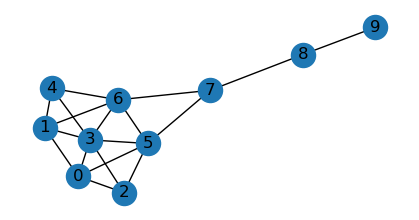

In [78]:
g_kite = nx.krackhardt_kite_graph()

plt.figure(figsize=(4, 2))
pos = nx.spring_layout(g_kite, seed=10)  # Fixed layout with a seed
nx.draw(g_kite, pos, with_labels=True)
plt.show()

The answer to this question depends on how 'importance' is operationalized. If we define importance as the node with the most connections, node 3 (six edges) is the winner.

However if we emphasize how close is the node to other nodes, we may see that perhaps node 3, is too distant in relation to s nodes 8 and 9. From this perspective, nodes 5 and 6 might be considered more important.

Node 7 also has an property that makes it special. If we remove node 7, the kite loses its tail (nodes 8 and 9) and in this way perhaps it also has a claim to being specially important.

Centrality will be further discussed in Chapter 3.


## 2.12 Community Detection

Network analysis allows for the detection of communities in networks, which are sometimes also called 'cliques'  or 'clusters'. The idea behind community detection is to group together nodes that are tightly connected to each other. In most scenarios, that means that the level of connection within the nodes of a particular community will be higher than outside of it. Nodes that belong to the same community are likely to share common attributes or functions, and they often possess different properties than the larger network.

Various algorithms exist to detect communities. The Girvan-Newman Algorithm, Label Propagation Communities and Louvain Communities will be explored in Chapter 4.

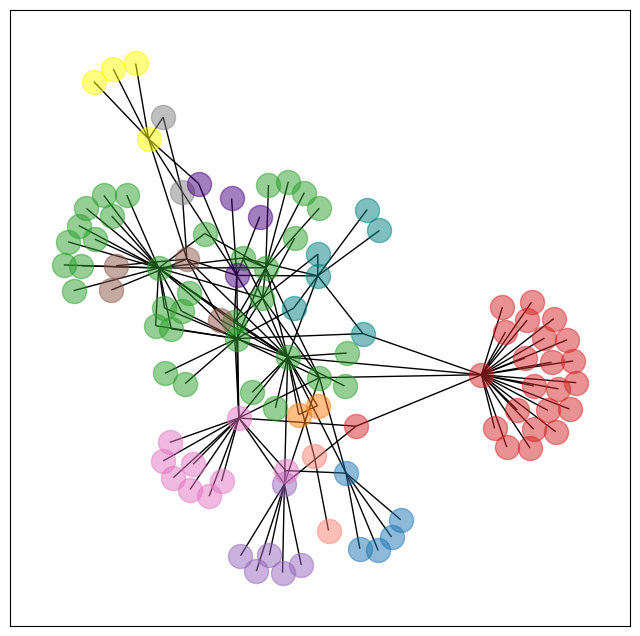

In [79]:
g_drones = nx.to_undirected(g_drones)
results = list(nx.algorithms.community.label_propagation_communities(g_drones))
len(results)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g_drones, seed =123)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[0]), node_color="tab:blue", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[1]), node_color="tab:red", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[2]), node_color="tab:green", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[3]), node_color="tab:orange", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[4]), node_color="tab:purple", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[5]), node_color="tab:pink", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[6]), node_color="tab:brown", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[7]), node_color="teal", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[8]), node_color="salmon", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[9]), node_color="yellow", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[10]), node_color="gray", alpha = 0.5)
nx.draw_networkx_nodes(g_drones, pos=pos, nodelist=list(results[11]), node_color="indigo", alpha = 0.5)
nx.draw_networkx_edges(g_drones, pos=pos);